In [4]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


A "set" S is a collection of things without order, comparison, or any other property beyond membership in the set. We write
$$ S = \left\{ s_1, s_2, \cdots, s_n \right\} $$



$$ s \in S \iff  \cup  {s} \neq \varnothing $$

## Open Sets
We say a set S in `open` iff it does not contain its boundary. 
Defining "boundary" requires us to have a Topology.

For some set $S$ (think $\mathbb{R}$ if you like) we will want to define
sets of subsets which behave in useful ways - like giving us a notion of "nearness".

A set T (of subsets of a set $S$)is a Topological Space iff

* the union of any subset of T (that is, the union of a set of subsets of $S$) is in T
* the intersection of any finite subset of T is in T
* the empty set $\varnothing$ and $T$ itself are in $T$.

So `elements` in $T$ are subsets of elements of $S$.
A `set` $T$ is a defined set of sets in $S$. It might be infinite or not.
A `Topological Space` $TS$ is a set of these sets - let's use $TS_\mathit{finite}$ to mean only finite sets $T$ of sets $t$ (of elements in $S$).



$$ \bigcap_{T} t  \in  T $$
$$ \bigcup_{T_{\mathit{finite}}} t  \in  T $$
$$ \{ \varnothing, T \} \subset TS $$


Let's make some more conrete examples. Let $S = \mathbb{R}$$, and $TS$ be the set of all open intervals on $S$. That is, let

$$ t_{(a,b)} := \{ s \in S : a \lt s \lt b \ \} $$

then 

$$ T = \{ t_{(a,b)} \forall a,b \in \mathbb{R} \} $$

What if we used the closed intervals, so
$$ t_{(a,b)} := \{ s \in S : a \le s \le b \ \} $$

Now we can construct the set $t$ as 
$$ \{ t_{(a,b)} \forall a,b : a \gt 0, b \ge a \} $$

which does not lie in $T$ since it cannot be expressed as a closed interval.
That is, T is the set of all closed intervals whose bounds are strictly greater than zero. This bound can get infinitely near to zero, but does not include it. So for anything near but not equal to zero, the closed interval is in $T$. But any interval with lower bound equal to zero is not in $T$. Since $T$ is not in $TS$, $TS$ is NOT a topological space.


## Continuous Functions
A function 

$$ F : A \rightarrow B $$
is `continuous` iff $$F^{-1}(s)    


# Motivating Example

Let
$$ \mathbb{N} := \{ \mathcal{N}_{\mu, \sigma} \forall \mu \in \mathbb{R}, \forall \sigma \in \mathbb{R}^+ \} $$
be the set of all normal distributions. Note it looks a bit like the open upper half plane. 

Now let $n \in \mathbb{N} $ be some unknown normal distribution. As we recieve samples from it $ x_i \in \mathbb{R}$ we will update our best estimate $ n_i $ of $n$ thus creating a sequence across $\mathbb{N}$ of points on the open upper half plane. Note that these points do not represent samples (which are after all in $]mathbb{R}$ but distributions. Members of the Exponential family.

Let try this out in simulation.

Let's simplify this an assume the unknown normal is the standardm, $\mathcal{N}_0,1$.
Then we just need to generate a list of samples:

then the list of estimated distributions at each time step. We'll just take the sample mean and std dev.

In [10]:
import numpy as np

def sample_normal(n=100, mu=0.0, sigma=1.0):
    return np.random.normal(loc=mu, scale=sigma, size=n)

def sample_stats(data):
    return np.mean(data), np.std(data, ddof=1)

In [2]:
sample_normal(10)

array([ 1.26601737, -0.80374862, -1.48630937,  0.36252823,  0.74637075,
       -0.68105554,  0.44719854,  0.22795175, -0.21036575,  0.3492339 ])

(array([   8.,  104.,  460., 1377., 2461., 2857., 1848.,  697.,  172.,
          16.]),
 array([-3.79966066, -3.06340831, -2.32715597, -1.59090362, -0.85465127,
        -0.11839892,  0.61785342,  1.35410577,  2.09035812,  2.82661047,
         3.56286281]),
 <BarContainer object of 10 artists>)

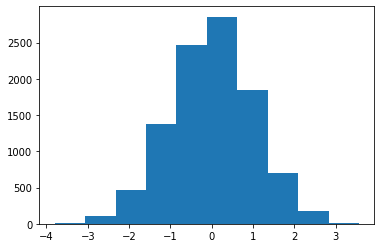

In [8]:
plt.hist(sample_normal(10000))

In [14]:
sample_stats(samples[:4])

(-0.06439172654064917, 1.0567510403017688)

In [15]:
samples = sample_normal(100)
estimates = [ sample_stats( list(samples[:i])) for i in range(len(samples))]

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


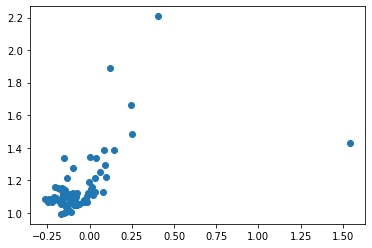

In [18]:
plt.scatter([e[0] for e in estimates], [e[1] for e in estimates])

```mermaid
graph TD
    A[Jupyter Notebook] --> C(Rendered Diagram);
    B[Markdown Cell] --> C;
```

In [ ]:
def run_one(n=100):
    